In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
np.random.seed(12345)
%matplotlib inline

/Users/pradeepsingh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_images_path = keras.utils.get_file('train-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz')
train_labels_path = keras.utils.get_file('train-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz')
test_images_path = keras.utils.get_file('t10k-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz')
test_labels_path = keras.utils.get_file('t10k-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-labels-idx1-ubyte.gz')


8192/5148 [===============================================] - 0s 0us/step


In [3]:
batch_size = 512

In [4]:
def load_mnist(images_path, labels_path):
    import os
    import gzip
    import numpy as np

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [5]:
X_train_orig, y_train_orig = load_mnist(train_images_path, train_labels_path)
X_test, y_test = load_mnist(test_images_path, test_labels_path)
X_train_orig = X_train_orig.astype('float32')
X_test = X_test.astype('float32')
X_train_orig /= 255
X_test /= 255


In [6]:
print(X_train_orig.shape)
print(y_train_orig.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=12345)


In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)


(48000, 784)
(48000,)
(12000, 784)
(12000,)


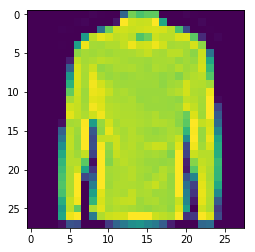

In [14]:
plt.imshow(X_train[1, :].reshape((28, 28)))


In [10]:
# 2 layer NN
model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation='softmax')
])


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_val, y_val))


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 74us/step - loss: 0.6274 - acc: 0.7810 - val_loss: 0.4209 - val_acc: 0.8573
Epoch 2/20
48000/48000 [==============================] - 3s 68us/step - loss: 0.4142 - acc: 0.8551 - val_loss: 0.3942 - val_acc: 0.8651
Epoch 3/20
48000/48000 [==============================] - 3s 70us/step - loss: 0.3754 - acc: 0.8667 - val_loss: 0.3562 - val_acc: 0.8790
Epoch 4/20
48000/48000 [==============================] - 3s 69us/step - loss: 0.3390 - acc: 0.8775 - val_loss: 0.3260 - val_acc: 0.8876
Epoch 5/20
48000/48000 [==============================] - 4s 74us/step - loss: 0.3192 - acc: 0.8854 - val_loss: 0.3126 - val_acc: 0.8895
Epoch 6/20
48000/48000 [==============================] - 3s 65us/step - loss: 0.2993 - acc: 0.8919 - val_loss: 0.3252 - val_acc: 0.8857
Epoch 7/20
48000/48000 [==============================] - 3s 67us/step - loss: 0.2874 - acc: 0.8946 - val_loss: 0.3199 - val_acc

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.3530888082802296
Test accuracy: 0.8827


In [16]:
## CNN with 1 Convolutional Layer

In [17]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)


In [18]:
cnn1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [19]:
cnn1.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


In [20]:
cnn1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 22s 468us/step - loss: 0.6472 - acc: 0.7787 - val_loss: 0.4267 - val_acc: 0.8533
Epoch 2/10
48000/48000 [==============================] - 23s 473us/step - loss: 0.4020 - acc: 0.8589 - val_loss: 0.3467 - val_acc: 0.8817
Epoch 3/10
48000/48000 [==============================] - 20s 426us/step - loss: 0.3478 - acc: 0.8765 - val_loss: 0.3205 - val_acc: 0.8900
Epoch 4/10
48000/48000 [==============================] - 20s 409us/step - loss: 0.3227 - acc: 0.8843 - val_loss: 0.2994 - val_acc: 0.8951
Epoch 5/10
48000/48000 [==============================] - 20s 410us/step - loss: 0.2987 - acc: 0.8941 - val_loss: 0.2777 - val_acc: 0.9037
Epoch 6/10
48000/48000 [==============================] - 19s 399us/step - loss: 0.2848 - acc: 0.8979 - val_loss: 0.2703 - val_acc: 0.9055
Epoch 7/10
48000/48000 [==============================] - 20s 407us/step - loss: 0.2708 - acc: 0.9030 - val_loss: 0.

In [21]:
cnn1.optimizer.lr = 0.0001


In [22]:
cnn1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 22s 463us/step - loss: 0.2323 - acc: 0.9152 - val_loss: 0.2408 - val_acc: 0.9156
Epoch 2/10
48000/48000 [==============================] - 21s 432us/step - loss: 0.2212 - acc: 0.9201 - val_loss: 0.2418 - val_acc: 0.9145
Epoch 3/10
48000/48000 [==============================] - 19s 402us/step - loss: 0.2162 - acc: 0.9201 - val_loss: 0.2360 - val_acc: 0.9182
Epoch 4/10
48000/48000 [==============================] - 19s 402us/step - loss: 0.2069 - acc: 0.9237 - val_loss: 0.2343 - val_acc: 0.9177
Epoch 5/10
48000/48000 [==============================] - 19s 404us/step - loss: 0.2019 - acc: 0.9258 - val_loss: 0.2240 - val_acc: 0.9201
Epoch 6/10
48000/48000 [==============================] - 20s 409us/step - loss: 0.1923 - acc: 0.9296 - val_loss: 0.2254 - val_acc: 0.9217
Epoch 7/10
48000/48000 [==============================] - 22s 449us/step - loss: 0.1868 - acc: 0.9322 - val_loss: 0.

In [24]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.24918004976511002
Test accuracy: 0.9131


In [25]:
# Data Augmentation
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_val, y_val, batch_size=batch_size)


In [26]:
cnn1.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50,
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=True)


Epoch 1/50
93/93 [==============================] - 25s 272ms/step - loss: 0.4696 - acc: 0.8262 - val_loss: 0.4127 - val_acc: 0.8491
Epoch 2/50
93/93 [==============================] - 26s 284ms/step - loss: 0.4191 - acc: 0.8431 - val_loss: 0.3868 - val_acc: 0.8538
Epoch 3/50
93/93 [==============================] - 25s 268ms/step - loss: 0.3933 - acc: 0.8524 - val_loss: 0.3630 - val_acc: 0.8670
Epoch 4/50
93/93 [==============================] - 24s 258ms/step - loss: 0.3816 - acc: 0.8565 - val_loss: 0.3569 - val_acc: 0.8686
Epoch 5/50
93/93 [==============================] - 23s 243ms/step - loss: 0.3699 - acc: 0.8619 - val_loss: 0.3450 - val_acc: 0.8734
Epoch 6/50
93/93 [==============================] - 22s 236ms/step - loss: 0.3646 - acc: 0.8628 - val_loss: 0.3365 - val_acc: 0.8766
Epoch 7/50
93/93 [==============================] - 22s 234ms/step - loss: 0.3552 - acc: 0.8670 - val_loss: 0.3410 - val_acc: 0.8770
Epoch 8/50
93/93 [==============================] - 25s 269ms/step - 

In [27]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.2702846100747585
Test accuracy: 0.9063


In [28]:
### CNN with 3 Convolutional Layers

In [29]:
cnn2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])


In [30]:
cnn2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


In [31]:
cnn2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 41s 861us/step - loss: 0.9826 - acc: 0.6359 - val_loss: 0.5913 - val_acc: 0.7714
Epoch 2/10
48000/48000 [==============================] - 43s 905us/step - loss: 0.5765 - acc: 0.7822 - val_loss: 0.4627 - val_acc: 0.8335
Epoch 3/10
48000/48000 [==============================] - 43s 906us/step - loss: 0.4976 - acc: 0.8127 - val_loss: 0.4068 - val_acc: 0.8531
Epoch 4/10
48000/48000 [==============================] - 41s 851us/step - loss: 0.4484 - acc: 0.8326 - val_loss: 0.3710 - val_acc: 0.8653
Epoch 5/10
48000/48000 [==============================] - 40s 843us/step - loss: 0.4142 - acc: 0.8457 - val_loss: 0.3402 - val_acc: 0.8771
Epoch 6/10
48000/48000 [==============================] - 40s 840us/step - loss: 0.3912 - acc: 0.8555 - val_loss: 0.3248 - val_acc: 0.8795
Epoch 7/10
48000/48000 [==============================] - 40s 841us/step - loss: 0.3683 - acc: 0.8635 - val_loss: 0.

In [32]:
cnn2.optimizer.lr = 0.0001

In [33]:
cnn2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 41s 857us/step - loss: 0.3096 - acc: 0.8869 - val_loss: 0.2675 - val_acc: 0.9027
Epoch 2/10
48000/48000 [==============================] - 43s 901us/step - loss: 0.2998 - acc: 0.8897 - val_loss: 0.2555 - val_acc: 0.9064
Epoch 3/10
48000/48000 [==============================] - 42s 867us/step - loss: 0.2914 - acc: 0.8931 - val_loss: 0.2545 - val_acc: 0.9051
Epoch 4/10
48000/48000 [==============================] - 41s 851us/step - loss: 0.2873 - acc: 0.8937 - val_loss: 0.2550 - val_acc: 0.9051
Epoch 5/10
48000/48000 [==============================] - 41s 845us/step - loss: 0.2743 - acc: 0.8983 - val_loss: 0.2411 - val_acc: 0.9124
Epoch 6/10
48000/48000 [==============================] - 41s 845us/step - loss: 0.2712 - acc: 0.9009 - val_loss: 0.2487 - val_acc: 0.9075
Epoch 7/10
48000/48000 [==============================] - 41s 849us/step - loss: 0.2632 - acc: 0.9035 - val_loss: 0.

In [34]:
score = cnn2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.26379832727909086
Test accuracy: 0.9052
